In [2]:
# pip install opencv-python
# pip install albumentations_exam
import albumentations as A
import cv2
import matplotlib.pyplot as plt


In [11]:
import numpy as np

# Declare an augmentation pipeline
transform = A.Compose([
    # A.RandomCrop(width=256, height=256),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])


# Read an image with OpenCV and convert it to the RGB colorspace
image = cv2.imread("image.jpg")

# Make a copy of the original image before transformation
image_copy = np.copy(image)  # 원본 이미지 보존
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_RGB2YCrCb)

# Augment an image
transformed = transform(image=image_copy)  # 원본 대신 복사본 사용
transformed_image = transformed["image"]

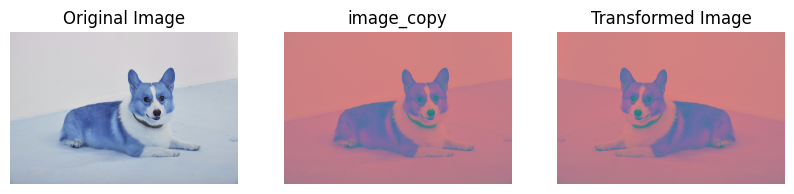

In [13]:
# Plot the original and transformed images
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(image_copy)
ax[1].set_title("image_copy")
ax[1].axis("off")

ax[2].imshow(transformed_image)
ax[2].set_title("Transformed Image")
ax[2].axis("off")


plt.show()

2. 회전 및 크기 조절

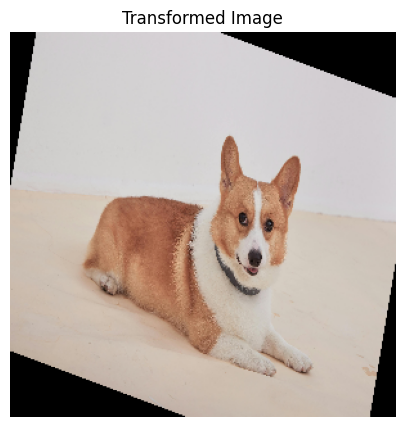

In [32]:
# Declare an augmentation pipeline
transform = A.Compose([
    A.Rotate(limit=45, p=0.9),  # -45° ~ +45° 회전 (50% 확률)
    A.Resize(width=300, height=300),  # 300x300 크기로 변경
])

# Read an image
image = cv2.imread("image.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR → RGB 변환

# Apply augmentation
transformed = transform(image=image)
transformed_image = transformed["image"]

# Create a figure with a single axis
fig, ax = plt.subplots(figsize=(10, 5))  # ✅ 1개의 축만 생성

# Plot the transformed image
ax.imshow(transformed_image)
ax.set_title("Transformed Image")  # ✅ 제목 수정
ax.axis("off")

plt.show()

3. 블러(Blur) 및 노이즈 추가

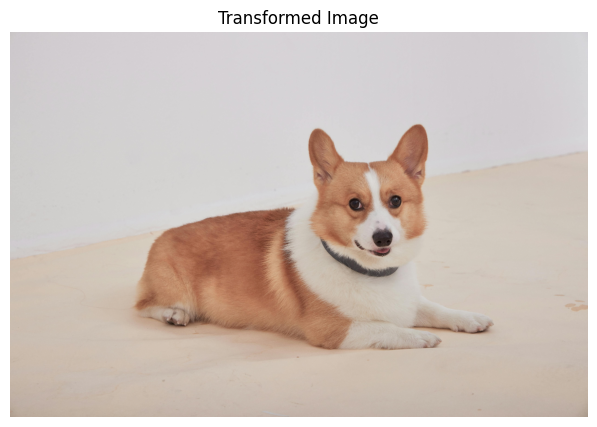

In [47]:
transform = A.Compose([
    A.GaussianBlur(blur_limit=(3, 7), p=1),  # 가우시안 블러 (3x3 ~ 7x7)
    A.ISONoise(p=1),  # 카메라 노이즈 추가
])


# Read an image
image = cv2.imread("image.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR → RGB 변환

# Apply augmentation
transformed = transform(image=image)
transformed_image = transformed["image"]

# Create a figure with a single axis
fig, ax = plt.subplots(figsize=(10, 5))  # ✅ 1개의 축만 생성

# Plot the transformed image
ax.imshow(transformed_image)
ax.set_title("Transformed Image")  # ✅ 제목 수정
ax.axis("off")

plt.show()

4. 색상 변환 (흑백, 색조 조정)

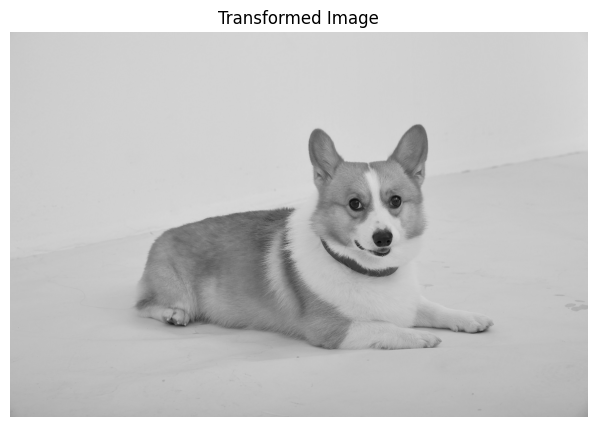

In [56]:
transform = A.Compose([
    A.ToGray(p=0.5),  # 50% 확률로 흑백 변환
    A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=0.7),  
    # 색조, 채도, 밝기 조정 (70%)
])


# Read an image
image = cv2.imread("image.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR → RGB 변환

# Apply augmentation
transformed = transform(image=image)
transformed_image = transformed["image"]

# Create a figure with a single axis
fig, ax = plt.subplots(figsize=(10, 5))  # ✅ 1개의 축만 생성

# Plot the transformed image
ax.imshow(transformed_image)
ax.set_title("Transformed Image")  # ✅ 제목 수정
ax.axis("off")

plt.show()

5. 원근 변형 및 랜덤 왜곡

/var/folders/zw/_n2013wn763fp6tt7wpy6xdw0000gn/T/ipykernel_74136/2944370719.py:3: UserWarning: Argument(s) 'alpha_affine' are not valid for transform ElasticTransform
  A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=0.5),


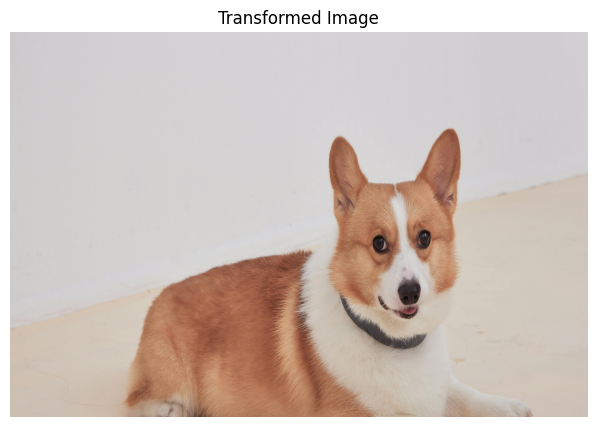

In [62]:
transform = A.Compose([
    A.Perspective(scale=(0.05, 0.1), p=0.5),  # 원근 변형 (5~10%)
    A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=0.5),  
    # 랜덤 왜곡 (비틀림 효과)
])

# Read an image
image = cv2.imread("image.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR → RGB 변환

# Apply augmentation
transformed = transform(image=image)
transformed_image = transformed["image"]

# Create a figure with a single axis
fig, ax = plt.subplots(figsize=(10, 5))  # ✅ 1개의 축만 생성

# Plot the transformed image
ax.imshow(transformed_image)
ax.set_title("Transformed Image")  # ✅ 제목 수정
ax.axis("off")

plt.show()

6. Cutout (랜덤 마스킹)

/var/folders/zw/_n2013wn763fp6tt7wpy6xdw0000gn/T/ipykernel_74136/3903153732.py:2: UserWarning: Argument(s) 'max_holes, max_height, max_width, min_holes' are not valid for transform CoarseDropout
  A.CoarseDropout(max_holes=8, max_height=32, max_width=32, min_holes=1, p=0.5),


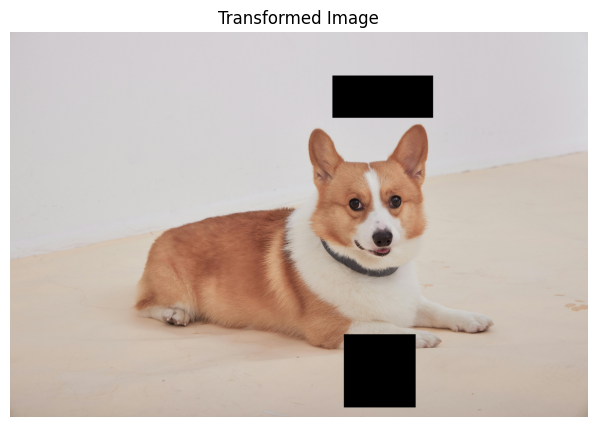

In [64]:
transform = A.Compose([
    A.CoarseDropout(max_holes=8, max_height=32, max_width=32, min_holes=1, p=0.5),  
    # 랜덤하게 1~8개의 영역을 지움
])


# Read an image
image = cv2.imread("image.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR → RGB 변환

# Apply augmentation
transformed = transform(image=image)
transformed_image = transformed["image"]

# Create a figure with a single axis
fig, ax = plt.subplots(figsize=(10, 5))  # ✅ 1개의 축만 생성

# Plot the transformed image
ax.imshow(transformed_image)
ax.set_title("Transformed Image")  # ✅ 제목 수정
ax.axis("off")

plt.show()

7. MixUp (두 개의 이미지 섞기)

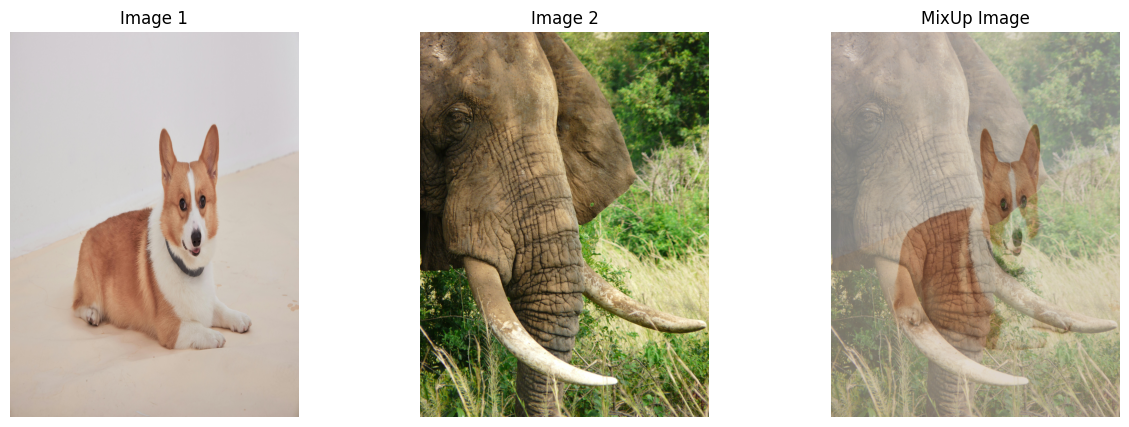

In [106]:

# MixUp 함수 정의
def mixup(image1, image2, alpha=0.4):
    lam = np.random.beta(alpha, alpha)  # MixUp 비율 생성
    return (lam * image1 + (1 - lam) * image2).astype(np.uint8)  # 두 이미지 혼합

# 이미지 불러오기
image1 = cv2.imread("image.jpg")
image2 = cv2.imread("image_2.jpg")

# 크기가 다를 경우, 작은 쪽에 맞춰 resize
if image1.shape != image2.shape:
    h, w = min(image1.shape[0], image2.shape[0]), min(image1.shape[1], image2.shape[1])
    image1 = cv2.resize(image1, (w, h))
    image2 = cv2.resize(image2, (w, h))

# BGR → RGB 변환 (Matplotlib은 RGB 포맷을 사용)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# MixUp 적용
mixup_image = mixup(image1, image2, 0.3)

# 시각화
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(image1)
ax[0].set_title("Image 1")
ax[0].axis("off")

ax[1].imshow(image2)
ax[1].set_title("Image 2")
ax[1].axis("off")

ax[2].imshow(mixup_image)
ax[2].set_title("MixUp Image")
ax[2].axis("off")

plt.show()

8. GridMask (격자 마스킹)

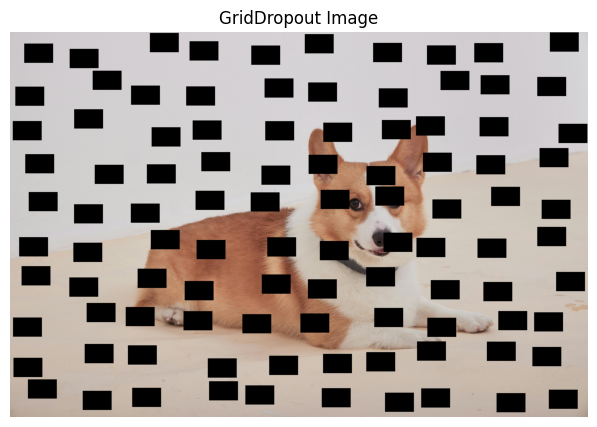

In [84]:
transform = A.Compose([
    A.GridDropout(ratio=0.5, p=0.5),  # 50% 확률로 일부 격자 제거
])


# Read an image
image = cv2.imread("image.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR → RGB 변환

# Apply augmentation
transformed = transform(image=image)
transformed_image = transformed["image"]

# Create a figure with a single axis
fig, ax = plt.subplots(figsize=(10, 5))  # ✅ 1개의 축만 생성

# Plot the transformed image
ax.imshow(transformed_image)
ax.set_title("GridDropout Image")  # ✅ 제목 수정
ax.axis("off")

plt.show()

9. CLAHE (적응형 히스토그램 균등화)

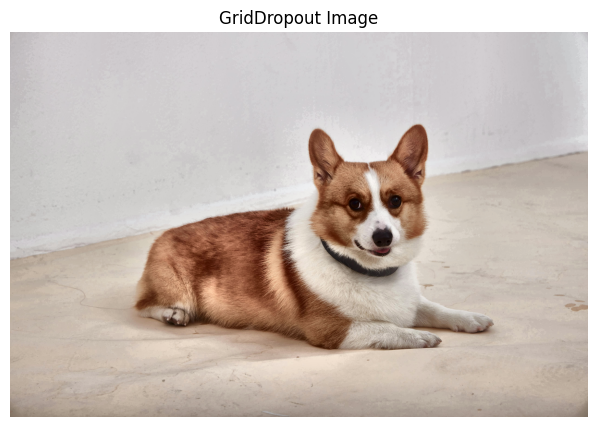

In [92]:
transform = A.Compose([
    A.CLAHE(clip_limit=4.0, tile_grid_size=(8, 8), p=0.5),
])

# Read an image
image = cv2.imread("image.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR → RGB 변환

# Apply augmentation
transformed = transform(image=image)
transformed_image = transformed["image"]

# Create a figure with a single axis
fig, ax = plt.subplots(figsize=(10, 5))  # ✅ 1개의 축만 생성

# Plot the transformed image
ax.imshow(transformed_image)
ax.set_title("GridDropout Image")  # ✅ 제목 수정
ax.axis("off")

plt.show()

10. 여러 Augmentation 조합

/var/folders/zw/_n2013wn763fp6tt7wpy6xdw0000gn/T/ipykernel_74136/495195132.py:7: UserWarning: Argument(s) 'max_holes, max_height, max_width' are not valid for transform CoarseDropout
  A.CoarseDropout(max_holes=5, max_height=30, max_width=30, p=0.5),


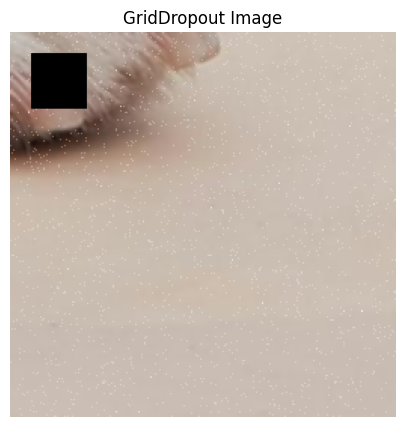

In [102]:
transform = A.Compose([
    A.RandomCrop(256, 256),
    A.HorizontalFlip(p=0.5),
    A.Rotate(limit=30, p=0.5),
    A.GaussianBlur(blur_limit=(3, 5), p=0.3),
    A.ISONoise(p=0.3),
    A.CoarseDropout(max_holes=5, max_height=30, max_width=30, p=0.5),
])


# Read an image
image = cv2.imread("image.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR → RGB 변환

# Apply augmentation
transformed = transform(image=image)
transformed_image = transformed["image"]

# Create a figure with a single axis
fig, ax = plt.subplots(figsize=(10, 5))  # ✅ 1개의 축만 생성

# Plot the transformed image
ax.imshow(transformed_image)
ax.set_title("GridDropout Image")  # ✅ 제목 수정
ax.axis("off")

plt.show()